In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential
from sklearn.model_selection import train_test_split
import csv

In [3]:
with np.load('dataset50000.npz') as data:
    x_data,y_data = data['x'],data['y']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_7 (Normalizati (None, 18)                37        
_________________________________________________________________
dense_129 (Dense)            (None, 40)                760       
_________________________________________________________________
dense_130 (Dense)            (None, 30)                1230      
_________________________________________________________________
dense_131 (Dense)            (None, 8)                 248       
Total params: 2,275
Trainable params: 2,238
Non-trainable params: 37
_________________________________________________________________
None
Epoch 1/100
450/450 [==============================] - 1s 2ms/step - loss: 1.4763 - accuracy: 0.1233 - val_loss: 1.3907 - val_accuracy: 0.1226
Epoch 2/100
450/450 [==============================] - 1s 1ms/step - loss: 1.3277 - accuracy: 0.1330 

Epoch 52/100
450/450 [==============================] - 1s 1ms/step - loss: 0.8375 - accuracy: 0.1689 - val_loss: 0.8396 - val_accuracy: 0.1678
Epoch 53/100
450/450 [==============================] - 1s 1ms/step - loss: 0.8371 - accuracy: 0.1689 - val_loss: 0.8392 - val_accuracy: 0.1678
Epoch 54/100
450/450 [==============================] - 1s 1ms/step - loss: 0.8367 - accuracy: 0.1690 - val_loss: 0.8388 - val_accuracy: 0.1682
Epoch 55/100
450/450 [==============================] - 1s 1ms/step - loss: 0.8363 - accuracy: 0.1693 - val_loss: 0.8385 - val_accuracy: 0.1682
Epoch 56/100
450/450 [==============================] - 1s 1ms/step - loss: 0.8360 - accuracy: 0.1691 - val_loss: 0.8381 - val_accuracy: 0.1686
Epoch 57/100
450/450 [==============================] - 1s 1ms/step - loss: 0.8356 - accuracy: 0.1690 - val_loss: 0.8378 - val_accuracy: 0.1688
Epoch 58/100
450/450 [==============================] - 1s 1ms/step - loss: 0.8353 - accuracy: 0.1692 - val_loss: 0.8375 - val_accuracy:

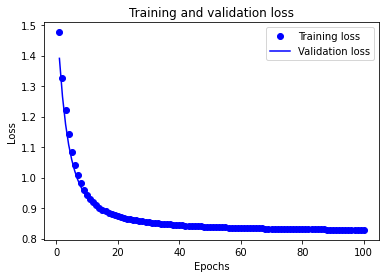

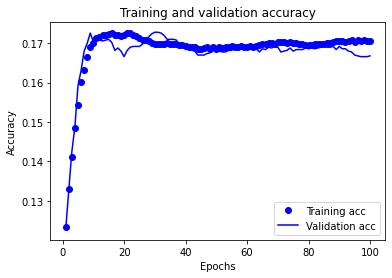

In [14]:

normLayer = keras.layers.experimental.preprocessing.Normalization()
normLayer.adapt(x_train)


model = Sequential([
                normLayer,
                Dense(40, input_shape = (18,), activation='linear'),
                Dense(30, activation='relu'),
                Dense(8, activation='linear'),

])

print(model.summary())


model.compile(loss="mse", optimizer = keras.optimizers.Adam(learning_rate=1e-5), metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs = 100, batch_size = 100 , validation_data = (x_test, y_test))

history_dict = history.history
history_dict.keys()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [11]:
model.save("model")

INFO:tensorflow:Assets written to: model\assets
